
  # **Titanic Survival Prediction**



*Titanic Survival Prediction is a classic data science project based on the Titanic dataset, which contains information about passengers who were on board the Titanic, including whether they survived or not. The goal is to build a predictive model that can predict whether a passenger would have survived the Titanic disaster based on features like age, gender, ticket class, and more.

*This project typically involves data preprocessing, exploratory data analysis (EDA), feature engineering, and machine learning. You'll use algorithms like logistic regression, decision trees, or random forests for prediction.



  **Importing All Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Datasets**

In [3]:
train_DS=pd.read_csv('/content/tested.csv')
train_DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Finding Missing Values**

In [4]:
train_DS.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [5]:
train_DS.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Observation:

In [6]:
train_DS.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Graphical representation

<Axes: >

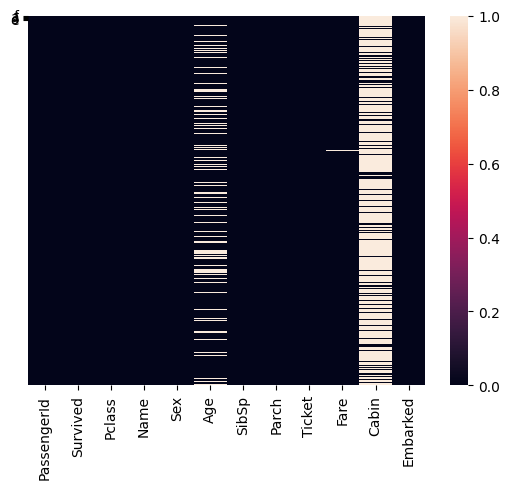

In [7]:
sns.heatmap(train_DS.isnull(),yticklabels="false")

<ipython-input-8-1932b9f3e4f5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( train_DS.corr() , cmap='YlGnBu')


<Axes: >

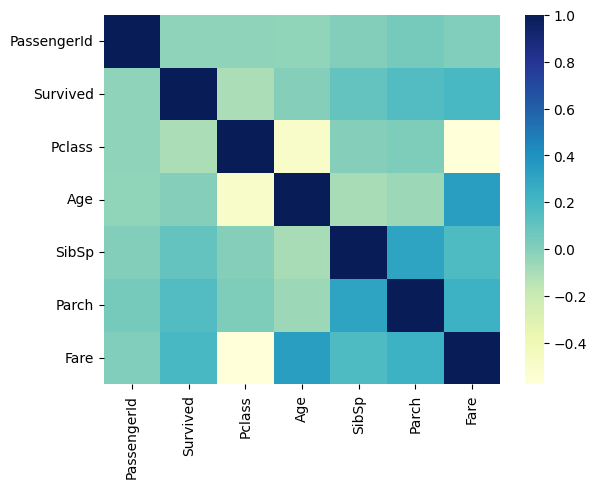

In [8]:
#Finding the Correlation of Survived with other features
#In seaborn
sns.heatmap( train_DS.corr() , cmap='YlGnBu')

In [9]:
train_DS.corr()

<ipython-input-9-fa9b8aca5301>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_DS.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [10]:
#Observation
#age and pclass are having strong relation as the values are closer to -1 or +1
train_DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


removing unneccessary attributes which does not make any change

In [11]:
train_DS.drop('Name', axis=1, inplace=True)


In [12]:
train_DS.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train_DS.drop('Ticket',axis=1,inplace=True)

In [14]:
train_DS.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_DS.drop('PassengerId',axis=1,inplace=True)

In [16]:
train_DS['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

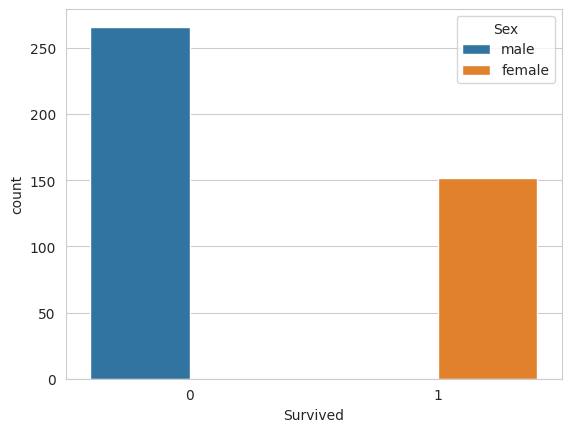

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_DS)

In [18]:
#Lets Convert Categorical Data to numerical
#Sex can be converted as Male as 1 and Female as 0 by using map
train_DS['Sex']=train_DS['Sex'].map({'male':1,'female':0})


In [19]:
train_DS.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,34.5,0,0,7.8292,NaN,Q
1,1,3,0,47.0,1,0,7.0000,NaN,S
2,0,2,1,62.0,0,0,9.6875,NaN,Q
3,0,3,1,27.0,0,0,8.6625,NaN,S
4,1,3,0,22.0,1,1,12.2875,NaN,S


In [20]:
train_DS['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [21]:
train_DS['Embarked']=train_DS['Embarked'].map({'S':0,'C':1,'Q':2})

In [22]:
train_DS['Sex'].astype(int)

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [23]:
train_DS['Embarked'].astype(int)

0      2
1      0
2      2
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: int64

In [24]:
train_DS.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked      int64
dtype: object

<Axes: xlabel='Age', ylabel='count'>

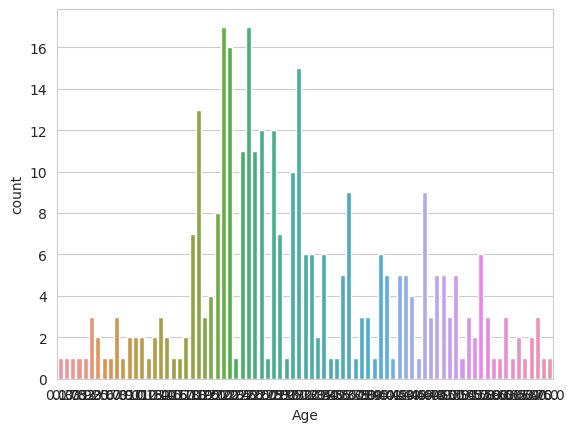

In [25]:
sns.countplot(data=train_DS,x='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

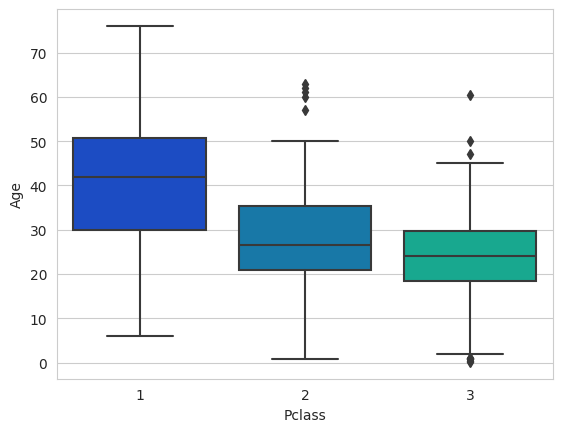

In [26]:
sns.boxplot(x='Pclass', y='Age', data=train_DS, palette='winter')


# Observation

The Agv age based on Pclass are 42, 26, 23

In [27]:
def upd_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 23
    else:
        return Age

In [28]:
train_DS['Age']=train_DS[['Age','Pclass']].apply(upd_age,axis=1)

In [29]:
train_DS.drop('Cabin',axis=1,inplace=True)

In [30]:
train_DS.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [31]:
train_DS.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False


In [32]:
train_DS.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [33]:
#fare value is missing so ,update its mean value for fare
train_DS['Fare']=train_DS['Fare'].fillna(train_DS['Fare'].mean())

In [34]:
train_DS.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
train_DS.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [36]:
train_DS['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [46]:
#spliting the data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
X= train_DS.drop(['Survived'], axis=1)
#y= train_DS.iloc[:,1]
y=train_DS['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=101)

In [43]:
y


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [47]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model Building

In [49]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)

# Model Evaluation

 Evaluating the models by generating classification report and cross validation scores


In [50]:
lr_report = classification_report(y_test, lr_pred)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

rf_report = classification_report(y_test, rf_pred)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

dt_report = classification_report(y_test, dt_pred)
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')


print('The classification report of Logistic Regression is below : ', '\n\n\n', lr_report)
print(f"Logistic Regression Mean Cross-Validation Score: {lr_scores}")
print('\n\n')
print('The classification report of Random Forest is below : ', '\n\n\n', rf_report)
print(f"Random Forest Mean Cross-Validation Score: {rf_scores}")

print('\n\n')
print('The classification report of Decision Tree Classifier is below : ', '\n\n\n', dt_report)
print(f"Decision Tree Classifier Mean Cross-Validation Score: {dt_scores}")

The classification report of Logistic Regression is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Logistic Regression Mean Cross-Validation Score: [1. 1. 1. 1. 1.]



The classification report of Random Forest is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Random Forest Mean Cross-Validation Score: [1. 1. 1. 1. 1.]



The classification report of Decision Tree Classifier is below :  


               precis

In [51]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

1.0